## Exploration of Linear and Non Linear Dimensionality Reduction Methods 

In [2]:
import pandas as pd 
from sklearn.decomposition import KernelPCA 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import numpy as np
import plotly.express as px
import nbformat

### Index

*Dimension Reduction Techniques*

* KPCA
* PCA
* AutoEncoders 
* TSNE
* More to follow

*Machine Learning Techniques*

* Boosted Forest (Close to default settings)
    * Input data from the reduced dimension data
    * K-fold stratified model training set selection 
    * Model training: without tuning hyperparameter 
    * Model performance 
    * SHAP plots 


### Objective

The excerise to explore dimensiality reduction is to observe if there are decision boundry. Furthermore, these diffrent output which produce an reduced feature output will be tested with 
various regression AI/ML models 

**Input both data tables provided to us:**

In [3]:
data_c = pd.read_table("data/sequence_ogt_topt_features2_JF_19Jun22.tab")
data = pd.read_table("data/sequence_ogt_topt_features2_JF_19Jun22.tab")

**Columns containing the protien structure information are retained, the rest are removed including the dependent variable**

In [4]:
Reduction_data = data.drop(["seq_id","seq_OGT","seq_TEMP","length"], axis = 1)

In [5]:
Reduction_data

,A,C,D,E,F,G,H,I,K,L,...,g_distance_21,g_distance_22,g_distance_23,g_distance_24,g_distance_25,g_distance_26,g_distance_27,g_distance_28,g_distance_29,g_distance_30
0,0.057292,0.005208,0.067708,0.093750,0.015625,0.072917,0.010417,0.078125,0.093750,0.088542,...,0.034347,0.032415,0.032451,0.032834,0.029978,0.030860,0.031718,0.030500,0.031564,0.030533
1,0.128743,0.023952,0.065868,0.059880,0.053892,0.068862,0.032934,0.041916,0.017964,0.083832,...,0.034243,0.032303,0.031779,0.031747,0.034163,0.031319,0.032579,0.030562,0.034217,0.031188
2,0.046154,0.003846,0.080769,0.046154,0.038462,0.076923,0.011538,0.134615,0.107692,0.084615,...,0.030898,0.032849,0.032089,0.031334,0.033246,0.032201,0.031122,0.029493,0.028413,0.031119
3,0.044910,0.000000,0.020958,0.029940,0.047904,0.059880,0.008982,0.092814,0.026946,0.059880,...,0.032492,0.031342,0.031397,0.032859,0.032442,0.032565,0.032662,0.033901,0.030358,0.032277
4,0.048000,0.016000,0.044000,0.108000,0.044000,0.076000,0.032000,0.092000,0.056000,0.108000,...,0.031849,0.033423,0.029825,0.032686,0.031649,0.033085,0.029445,0.031416,0.030575,0.030584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,0.104418,0.016064,0.048193,0.024096,0.038153,0.130522,0.016064,0.040161,0.028112,0.054217,...,0.031495,0.033294,0.032700,0.033431,0.031767,0.032473,0.031684,0.032180,0.032142,0.031725
2913,0.034268,0.009346,0.080997,0.077882,0.052960,0.034268,0.021807,0.087227,0.090343,0.105919,...,0.033287,0.033860,0.035131,0.032420,0.029850,0.032820,0.030632,0.031953,0.032836,0.031808
2914,0.107256,0.006309,0.066246,0.059937,0.044164,0.088328,0.025237,0.088328,0.044164,0.072555,...,0.034578,0.032948,0.029866,0.032200,0.032059,0.032234,0.032014,0.029896,0.030861,0.031916
2915,0.065630,0.012090,0.077720,0.065630,0.069085,0.051813,0.036269,0.062176,0.065630,0.077720,...,0.032182,0.032999,0.033771,0.032397,0.032886,0.033406,0.031966,0.033361,0.033047,0.032657


**Snapshot of the type of features**

* Single letter features :- A, B, C 
* Sequence of letters followed by number such as :- ANDN920101
* Sequence of letters followed by number and ".1" suffix such as :- ANDN920101.1
* Two letter combinations :- IC 
* Three letter combinations :- CAA
* Unique features 
    * shanon_entropy
    * atoms_C
    * atoms_H
    * atoms_N
    * atoms_O
    * atoms_S
    * bonds_total
    * bonds_single
    * bonds_double
* 3 digit number sequences like : 111
* Hydrophobicity features such as :- Hydrophobicity_ARGP820101-G1
* Normalized van der Waals Volume features such as :- .G1
* Polarity
* Polarizability
* Charge
* Secondary structure
* Solvent accessibility
* moreau_autocorrelation
* geary_autocorrelation
* lambda 1 - 30
* lambda_hphob 1 - 5
* lambda_hphil 1 - 5
* sw_distance
* grantham_distance
* g_distance



**Focus of the analysis**

The main features that we will focus on reduction are as follows:-

* Single letter features :- A, B, C 
* Sequence of letters followed by number such as :- ANDN920101
* Sequence of letters followed by number and ".1" suffix such as :- ANDN920101.1 (Removed beacuse they are identical to the features without the suffix)
* Two letter combinations :- IC 
* Three letter combinations :- CAA

These features put together come to a total of 8974 variables. And the focus of this notebook it to experiment with various dimensionality reduction methods to understand how temprature depends on other variables

In [6]:
Data_Full = Reduction_data.iloc[:,0:9526]
Data_Full = Data_Full.drop(Data_Full.iloc[:,574:1126],axis = 1)

In [7]:
scaler = StandardScaler()
  # transform data
Data_Full = scaler.fit_transform(Data_Full)
Data_Full = pd.DataFrame(Data_Full)
Data_Full

,0,1,2,3,4,5,6,7,8,9,...,8964,8965,8966,8967,8968,8969,8970,8971,8972,8973
0,-1.023056,-0.602029,0.562833,1.205018,-1.768946,-0.338811,-1.218386,0.848281,1.528621,0.070901,...,-0.102033,-0.168099,-0.180309,-0.154221,-0.151130,-0.188306,-0.191266,-0.180899,-0.088864,-0.180439
1,1.338968,1.535178,0.441042,-0.214374,1.044964,-0.533888,0.947390,-0.762430,-1.398985,-0.146976,...,-0.102033,-0.168099,-0.180309,-0.154221,-0.151130,-0.188306,-0.191266,-0.180899,-0.088864,-0.180439
2,-1.391250,-0.757348,1.427309,-0.789611,-0.089703,-0.146043,-1.110489,3.361195,2.067211,-0.110748,...,-0.102033,-0.168099,-0.180309,-0.154221,-0.151130,-0.188306,-0.191266,-0.180899,-0.088864,-0.180439
3,-1.432363,-1.195896,-2.531479,-1.469086,0.604645,-0.966058,-1.356372,1.501722,-1.052010,-1.255114,...,-0.102033,-0.168099,-0.180309,-0.154221,-0.151130,-0.188306,-0.191266,-0.180899,-0.088864,-0.180439
4,-1.330220,0.628462,-1.006377,1.802198,0.317558,-0.190456,0.857543,1.465495,0.070340,0.971136,...,-0.102033,-0.168099,-0.180309,-0.154221,-0.151130,-0.188306,-0.191266,-0.180899,-0.088864,-0.180439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,0.534837,0.635788,-0.728866,-1.713981,-0.112419,2.432872,-0.675189,-0.840522,-1.006954,-1.517129,...,-0.102033,-0.168099,-0.180309,-0.154221,-0.151130,3.234190,-0.191266,-0.180899,-0.088864,-0.180439
2913,-1.784176,-0.130266,1.442377,0.540016,0.976378,-2.198395,-0.122855,1.253192,1.396996,0.874860,...,-0.102033,-0.168099,-0.180309,7.041907,-0.151130,-0.188306,-0.191266,-0.180899,-0.088864,-0.180439
2914,0.628651,-0.476512,0.466048,-0.212000,0.329620,0.402709,0.207025,1.302154,-0.386882,-0.668710,...,-0.102033,-0.168099,-0.180309,-0.154221,-0.151130,-0.188306,-0.191266,-0.180899,-0.088864,-0.180439
2915,-0.747394,0.182613,1.225500,0.026599,2.162110,-1.354190,1.268185,0.138814,0.442362,-0.429752,...,-0.102033,-0.168099,-0.180309,-0.154221,-0.151130,-0.188306,-0.191266,-0.180899,-0.088864,-0.180439


### **Kernel PCA**

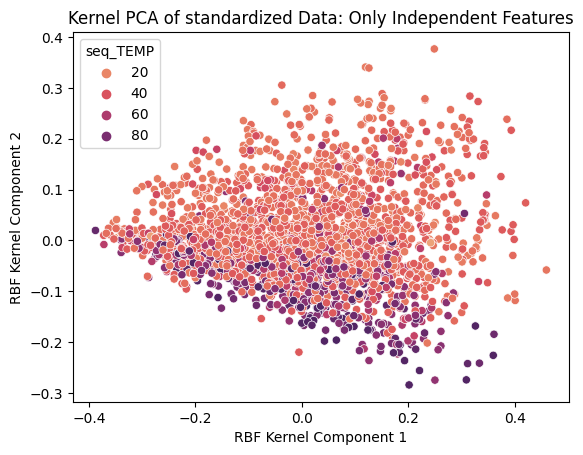

In [8]:
kpca = KernelPCA(n_components=2, kernel='rbf')
x_kpca = kpca.fit_transform(Data_Full)


x_tx = x_kpca
x_tx =pd.DataFrame(x_tx)
x_tx["seq_TEMP"] = data["seq_TEMP"]

# Create cool scatter plot
fig = sns.scatterplot(x=x_tx[0], y=x_tx[1],
                hue=x_tx['seq_TEMP'],
                palette='flare')
plt.xlabel("RBF Kernel Component 1")
plt.ylabel("RBF Kernel Component 2")
plt.title("Kernel PCA of standardized Data: Only Independent Features")
plt.show(fig)

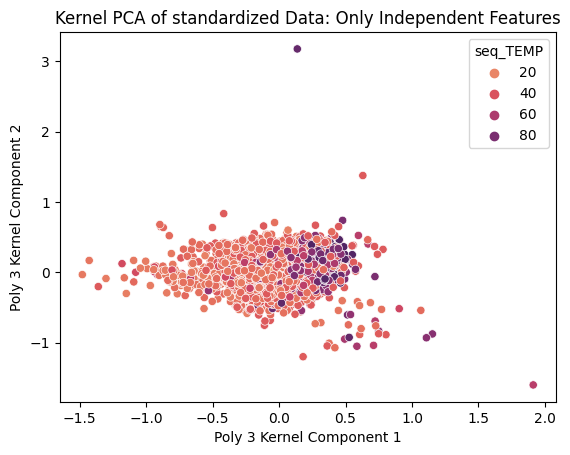

In [9]:
kpca = KernelPCA(n_components=2, kernel='poly', degree = 3)
x_kpca = kpca.fit_transform(Data_Full)


x_tx = x_kpca
x_tx =pd.DataFrame(x_tx)
x_tx["seq_TEMP"] = data["seq_TEMP"]

# Create cool scatter plot
fig = sns.scatterplot(x=x_tx[0], y=x_tx[1],
                hue=x_tx['seq_TEMP'],
                palette='flare')
plt.xlabel("Poly 3 Kernel Component 1")
plt.ylabel("Poly 3 Kernel Component 2")
plt.title("Kernel PCA of standardized Data: Only Independent Features")
plt.show(fig)

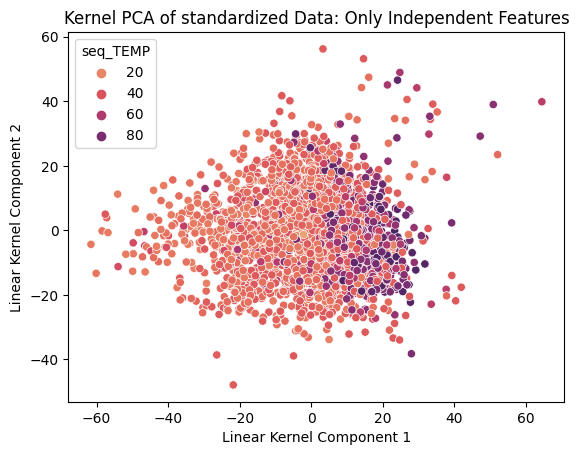

In [10]:
kpca = KernelPCA(n_components=2, kernel='linear')
x_kpca = kpca.fit_transform(Data_Full)


x_tx = x_kpca
x_tx =pd.DataFrame(x_tx)
x_tx["seq_TEMP"] = data["seq_TEMP"]

# Create cool scatter plot
fig = sns.scatterplot(x=x_tx[0], y=x_tx[1],
                hue=x_tx['seq_TEMP'],
                palette='flare')
plt.xlabel("Linear Kernel Component 1")
plt.ylabel("Linear Kernel Component 2")
plt.title("Kernel PCA of standardized Data: Only Independent Features")
plt.show(fig)

*Kernel PCA: RBF 3D Plot*

In [11]:
kpca = KernelPCA(n_components=3, kernel='rbf')
x_kpca = kpca.fit_transform(Data_Full)


x_tx = x_kpca
x_tx =pd.DataFrame(x_tx)
x_tx["seq_TEMP"] = data["seq_TEMP"]

fig = px.scatter_3d(x_tx, x=0, y=1, z=2,
              color='seq_TEMP')
fig.show()

*Kernel PCA: Linear 3D Plot*

In [12]:
kpca = KernelPCA(n_components=3, kernel= 'linear')
x_kpca = kpca.fit_transform(Data_Full)


x_tx = x_kpca
x_tx =pd.DataFrame(x_tx)
x_tx["seq_TEMP"] = data["seq_TEMP"]

fig = px.scatter_3d(x_tx, x=0, y=1, z=2,
              color='seq_TEMP')
fig.show()

In [13]:
kpca = KernelPCA(n_components=3, kernel= 'poly', degree = 2)
x_kpca = kpca.fit_transform(Data_Full)


x_tx = x_kpca
x_tx =pd.DataFrame(x_tx)
x_tx["seq_TEMP"] = data["seq_TEMP"]

fig = px.scatter_3d(x_tx, x=0, y=1, z=2,
              color='seq_TEMP')
fig.show()

*Kernel PCA: RBF component limit removed*

In [14]:
kpca = KernelPCA(kernel='rbf')
x_kpca = kpca.fit_transform(Data_Full)
x_tx = x_kpca
x_tx =pd.DataFrame(x_tx)
x_tx

,0,1,2,3,4,5,6,7,8,9,...,2864,2865,2866,2867,2868,2869,2870,2871,2872,2873
0,-0.196055,-0.042094,-0.013781,-0.036662,0.034378,-0.042475,-0.011677,-0.009253,0.009728,0.017807,...,-2.304087e-06,-2.255765e-05,1.142255e-05,8.514073e-07,8.758454e-06,-9.845995e-07,0.000007,-3.427906e-06,4.784617e-06,1.251656e-06
1,-0.113611,-0.007128,0.048242,-0.013750,0.016516,0.071876,0.001365,0.012502,-0.009035,-0.004395,...,5.745373e-06,-2.406402e-05,-3.769996e-05,7.359643e-07,1.440326e-05,-3.046182e-05,0.000015,-1.037980e-06,1.377181e-07,-1.704196e-06
2,-0.110135,-0.044392,-0.078837,0.018349,-0.050911,-0.063082,-0.004171,-0.008687,-0.012094,0.016396,...,1.438786e-05,3.514829e-07,4.376999e-05,3.393098e-06,-2.249061e-05,8.742227e-07,0.000010,4.136596e-06,5.604468e-06,2.292053e-06
3,-0.192614,0.048074,-0.025019,0.072662,-0.108870,0.004133,-0.006470,-0.009897,0.005480,-0.053531,...,-6.732090e-06,-3.428092e-06,-4.289851e-07,-5.915583e-06,2.320004e-06,-9.107729e-06,-0.000003,1.354950e-07,1.938100e-06,-7.855128e-08
4,-0.052681,-0.088100,-0.044475,0.630984,0.352410,-0.046214,0.003842,0.015985,-0.006946,0.008586,...,2.484134e-08,1.061705e-06,-6.904600e-06,-6.489557e-06,-4.841152e-06,1.153617e-07,0.000005,8.967940e-08,3.739299e-07,-1.274493e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,0.009416,0.258566,0.013194,0.003804,0.002152,-0.077556,-0.028839,-0.006039,-0.043725,-0.003982,...,5.082433e-05,1.783509e-05,1.580843e-05,6.095754e-05,-3.502666e-05,-9.670089e-06,-0.000008,-1.796187e-05,-4.507538e-06,-6.160912e-06
2913,-0.140738,-0.050371,-0.109608,-0.020748,0.009276,0.015222,0.009332,-0.007429,0.008265,0.002828,...,1.627993e-05,6.183459e-06,2.930632e-05,-8.194865e-07,3.356250e-06,-1.606273e-06,-0.000006,-9.906772e-07,5.947190e-06,-9.732144e-07
2914,-0.035113,-0.050040,0.040427,0.021582,-0.063057,-0.041737,-0.007022,-0.001575,-0.014669,0.002975,...,3.941194e-06,-1.675891e-05,-5.505112e-05,6.812723e-06,-1.295437e-05,-7.553482e-06,0.000005,6.745570e-06,3.494951e-06,3.398726e-07
2915,0.034814,-0.058377,-0.111998,0.037129,-0.068538,0.097967,0.022074,-0.009856,-0.024439,-0.012831,...,3.505625e-05,-2.197539e-05,-5.957960e-06,-3.347146e-07,2.126219e-06,1.457349e-06,0.000021,5.024972e-06,-1.500001e-06,-1.907876e-05


### **PCA**

In [34]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2000)
pca_data = pca.fit_transform(Data_Full)
pca_df = pd.DataFrame(data = pca_data)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,15.437769,-3.391769,-10.796706,15.642199,1.734099,-1.406360,-3.083595,0.413148,-0.473539,3.946087,...,0.383480,0.282015,0.554841,0.634280,-0.773966,0.028104,0.443723,-0.005132,0.040710,0.268186
1,1.166518,10.363098,-6.069666,-16.188985,-2.586171,-0.564842,2.129975,1.343139,-4.122011,4.521240,...,-0.327838,-0.205934,-1.160269,-0.606445,-0.410027,-1.374806,-1.089129,2.173262,1.206587,0.052487
2,13.231987,-12.295016,15.221636,14.553692,1.231138,-5.323447,2.121033,-2.560780,2.587955,-5.932985,...,0.527196,-0.328311,-0.616910,0.105741,-0.607135,-0.341186,-0.425022,0.389570,-1.263227,-0.793401
3,-5.229401,4.769050,45.270540,-5.221315,2.225670,1.203790,-9.445478,-2.860929,8.844864,2.778710,...,-0.765705,-0.414418,-0.814904,-1.304045,0.626100,0.797182,-0.265421,0.830803,-1.779417,-0.436274
4,11.999197,-0.865757,10.961549,-6.546957,80.250435,8.948345,12.837954,7.226043,-5.287843,-6.661683,...,0.191370,-0.440427,-0.821012,0.241409,-0.495370,-0.471562,-0.215717,-0.432740,0.198582,0.099833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,-42.038087,0.283325,5.697615,11.223601,0.035339,-0.146802,2.450029,4.485112,-3.932146,-4.474295,...,1.221977,-1.774733,1.410744,-0.698324,-0.321841,0.510019,-0.970436,-0.861849,0.544183,-1.517482
2913,16.768861,-25.739788,2.501089,-2.664318,-1.818859,7.973609,0.538144,-0.272796,-0.715113,0.600302,...,-0.086075,-0.753843,-1.293731,0.491610,-1.682846,0.029730,0.932788,-1.442552,0.251070,0.722388
2914,9.564043,10.417178,7.810988,7.188712,-2.957288,-5.253490,3.899638,-1.194411,-5.185738,-0.706683,...,-1.377011,-1.473567,1.161668,0.186277,0.783525,-0.788990,0.420853,-1.051695,0.473259,0.887721
2915,10.744945,-13.963809,11.020725,-13.980898,-1.706510,-3.662873,1.902957,-3.690009,0.404761,2.790248,...,2.261415,-0.711254,-0.229089,-0.919803,-0.198567,-0.156201,0.965962,1.120269,-1.670020,1.375989


In [35]:
sum_array = sum(pca.explained_variance_ratio_)
print(sum_array)

0.9425341246676833


Text(25, 0.95, 'Components needed: 1238')

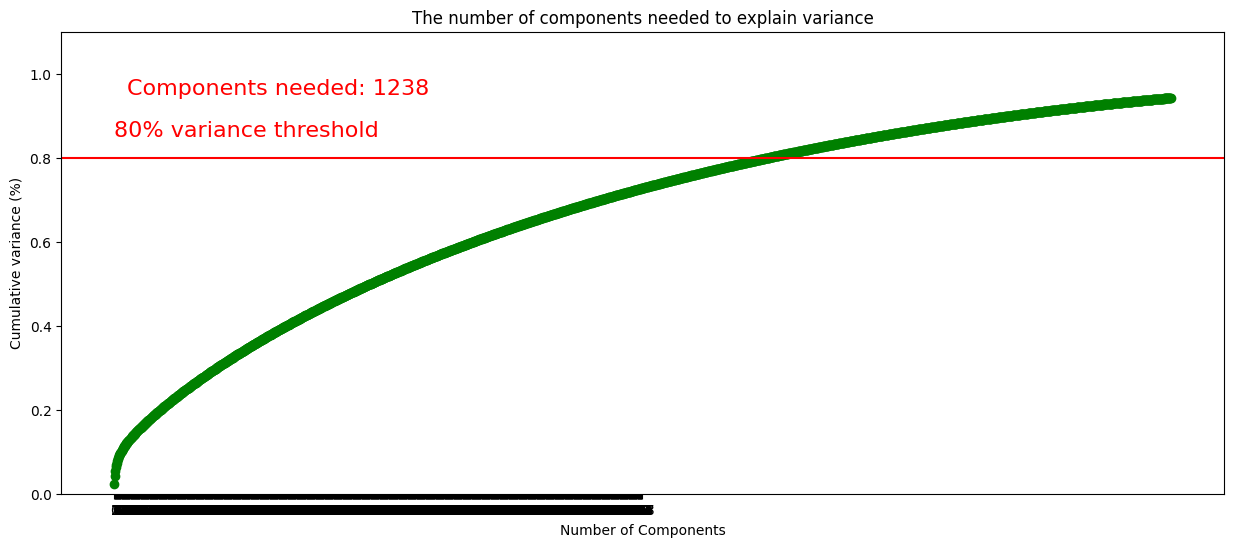

In [37]:
plt.figure(figsize = (15, 6))
components = np.arange(0,2000, step=1)
variance = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(components, variance, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0,999, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% variance threshold', color = 'red', fontsize=16)
plt.text(25, 0.95, "Components needed: "+str(np.where(np.cumsum(pca.explained_variance_ratio_)>=0.8)[0][0]), color = "red", fontsize=16)

In [38]:
x_pca = pca_df
x_pca["seq_TEMP"] = data["seq_TEMP"]
fig = px.scatter_3d(x_pca, x=0, y=1, z=2,
              color='seq_TEMP')
fig.show()

### **Autoencoder Reduction**

Reduced to 2 dimensions 

In [40]:
from sklearn.neural_network import MLPRegressor

autoencoder = MLPRegressor(alpha=1e-15, 
                           hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50), 
                           random_state=1, max_iter=20000)

autoencoder.fit(Data_Full,Data_Full)

MLPRegressor(alpha=1e-15, hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             max_iter=20000, random_state=1)

In [44]:
W = autoencoder.coefs_
biases = autoencoder.intercepts_
encoder_weights = W[0:4]
encoder_biases = biases[0:4]

In [45]:
def encoder(encoder_weights, encoder_biases, data):
    res_ae = data
    for index, (w, b) in enumerate(zip(encoder_weights, encoder_biases)):
        if index+1 == len(encoder_weights):
            res_ae = res_ae@w+b 
        else:
            res_ae = np.maximum(0, res_ae@w+b)
    return res_ae
            
res_ae = encoder(encoder_weights, encoder_biases, Data_Full)

In [48]:
res_ae = pd.DataFrame(res_ae)
res_ae["seq_TEMP"] = data["seq_TEMP"]
fig = px.scatter(res_ae, x=0, y=1,
              color='seq_TEMP')
fig.show()

Reduced to 3 dimensions 

In [49]:
autoencoder_3d = MLPRegressor(alpha=1e-15, 
                           hidden_layer_sizes=(50, 100, 50, 3, 50, 100, 50), 
                           random_state=1, max_iter=20000)

autoencoder_3d.fit(Data_Full,Data_Full)

MLPRegressor(alpha=1e-15, hidden_layer_sizes=(50, 100, 50, 3, 50, 100, 50),
             max_iter=20000, random_state=1)

In [50]:
W = autoencoder.coefs_
biases = autoencoder.intercepts_
encoder_weights = W[0:4]
encoder_biases = biases[0:4]

In [52]:
res_ae_3d = encoder(encoder_weights, encoder_biases, Data_Full)

res_ae_3d = pd.DataFrame(res_ae_3d)


res_ae_3d["seq_TEMP"] = data["seq_TEMP"]
fig = px.scatter_3d(res_ae_3d, x=0, y=1,z=2, 
              color='seq_TEMP')
fig.show()

### TSNE Reduction 

In [60]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=1000,learning_rate= 1.0)
tsne_results = tsne.fit_transform(Data_Full)

d:\anaconda\envs\Master_thesis\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2917 samples in 0.219s...
[t-SNE] Computed neighbors for 2917 samples in 1.069s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2917
[t-SNE] Computed conditional probabilities for sample 2000 / 2917
[t-SNE] Computed conditional probabilities for sample 2917 / 2917
[t-SNE] Mean sigma: 24.192642
[t-SNE] KL divergence after 100 iterations with early exaggeration: 71.306686
[t-SNE] KL divergence after 1000 iterations: 2.746042


In [61]:
tsne_results = pd.DataFrame(tsne_results)
tsne_results["seq_TEMP"] = data["seq_TEMP"]

fig = px.scatter_3d(tsne_results, x=0, y=1,z=2, 
              color='seq_TEMP')
fig.show()

### Conclusion 

**From observing all the plots, it is evident that higher temprature above 60 are mostly clustering close to eachother. Furthermore, temperature below 40 range are highly clusterd with each other, which gives an indication that a model built using the data may not have a high accuracy in predicting lower temprature threshold.**

**Moreover,as we can observe a slight boundry between lower and higher temperatures,it can be assumed that the model's performance should be better in determining between these two changes**